## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

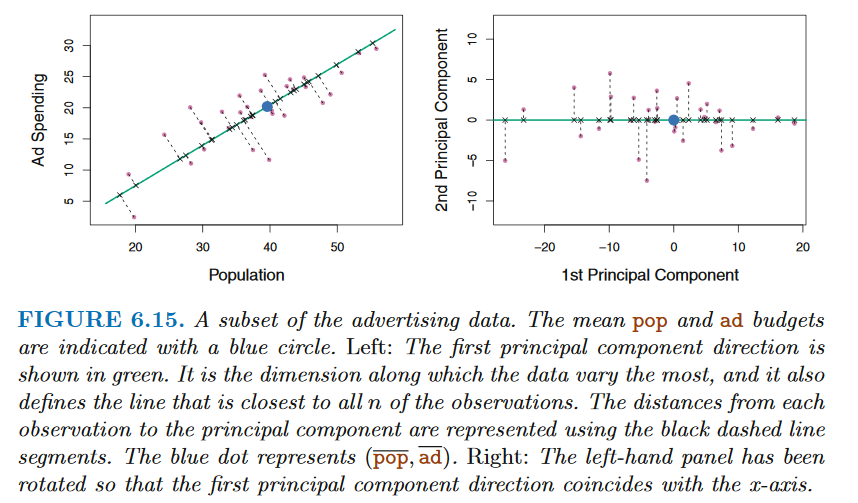

In [1]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

##### Respuesta:
En este caso el problema de maximización es:

$$ \max_{v \in R^d}\hat{\sigma}^2(Xv) \qquad s.a \qquad v'w =0, v'v=1$$

Donde $w$ es el primer vector propio. Construimos el Lagrangiano:

$$L = v' \hat{\Sigma} v + \lambda_1 (v'v-1) + \lambda_2(v'w-0)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial v} = 2 \hat{\Sigma} v- 2\lambda_1 v  - \lambda_2 w = 0 $$

pre-multiplicando por $w'$ nos queda:
$$2 w'\hat{\Sigma} v- 2\lambda_1 w'v  - \lambda_2 w'w = 0$$

como $w'v=0, w'w =1, \hat{\Sigma}w= \lambda w$ entonces:

$$2 w'\hat{\Sigma}v = \lambda_2 \implies \lambda_2 = 2v'\hat{\Sigma}w = 2v' \lambda w =  2\lambda v'w =0$$

Asi, la condición de máximo queda finalmente:

$$2 \hat{\Sigma} v- 2\lambda_1 v =0$$

$$\quad \implies \quad \hat{\Sigma} v = \lambda_1 v$$

Con lo cual $v$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xv) = v' \hat{\Sigma} v = v' (\lambda_1 v) = \lambda_1$$

La segunda dirección de máxima varianza es la dirección asociada al segundo vector propio $v$  cuyo valor propio es el segundo de mayor valor $\lambda_1$.


De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

##### Respuesta:
Puesto de $\hat{\Sigma}$ es la varianza empírica de $X$, se tiene que:

$
\begin{eqnarray*}
S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) & = & traza(\hat{\Sigma})\\
\mbox{de la propiedad en enunciado se tiene } \rightarrow
& = & \sum_{i=1}^d \lambda_i\\
\mbox{de la definición de valor propio resulta } \rightarrow & = & \sum_{i=1}^d \hat{\sigma}^2(Xw_i)\\
\mbox{por notación }\rightarrow & = & \sum_{i=1}^d \hat{\sigma}^2(Z_i)
\end{eqnarray*}
$


#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [1]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


### Análisis Exploratorio de Datos

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

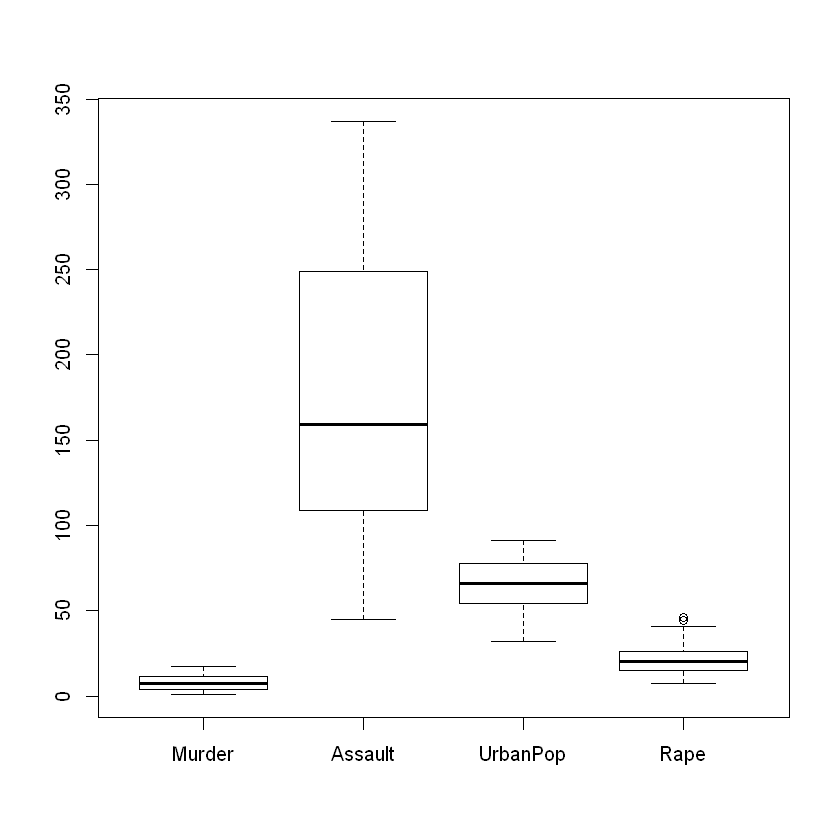

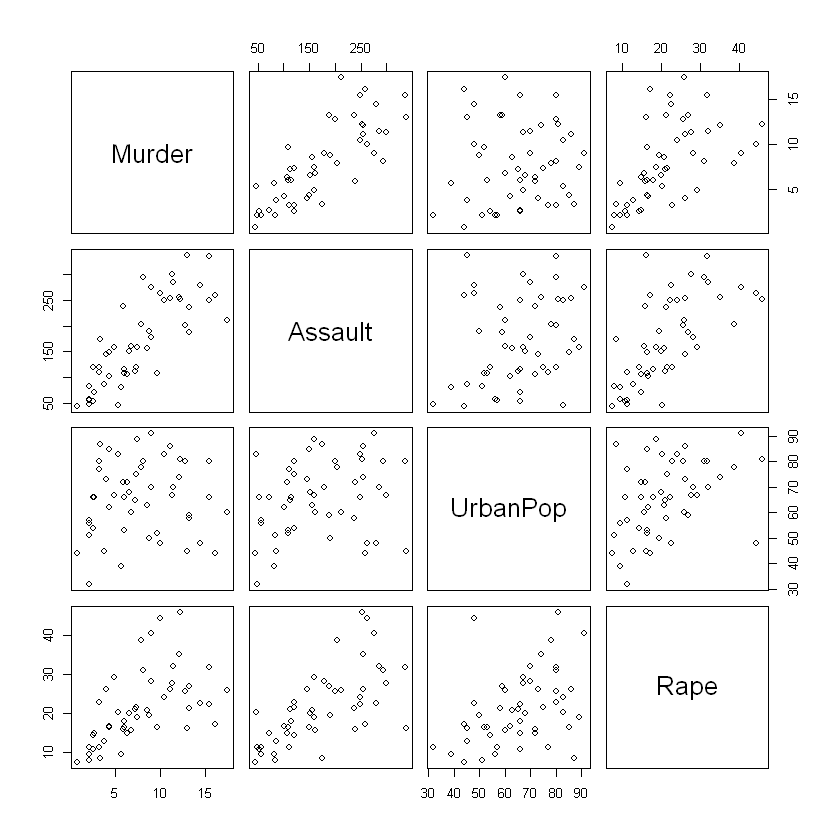

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


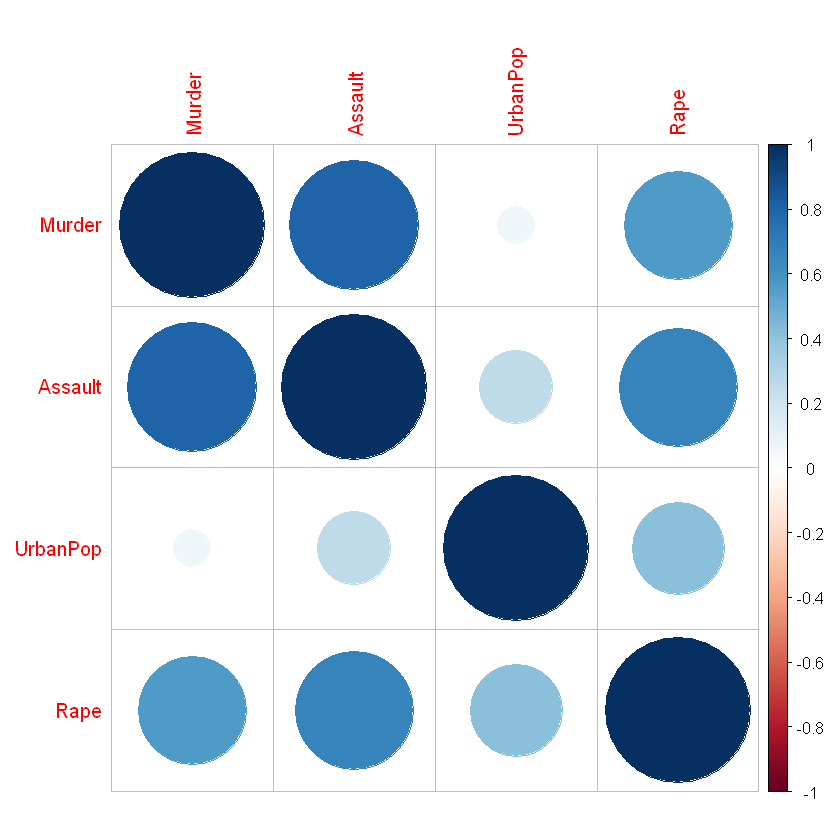

In [4]:
#install.packages('corrplot')
library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
corrplot(mcor)
print(mcor)



In [9]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)



Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [2]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


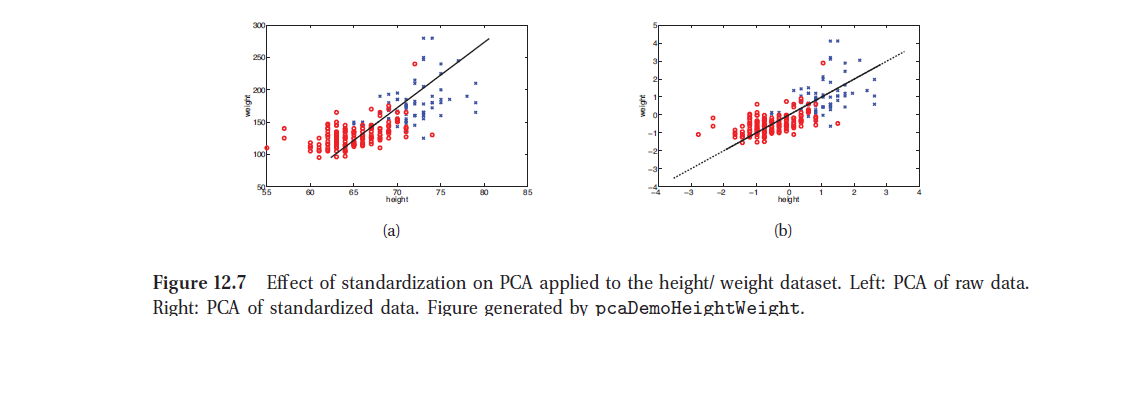

In [3]:
display_png(file="figura2.png")

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [3]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [12]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [19]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


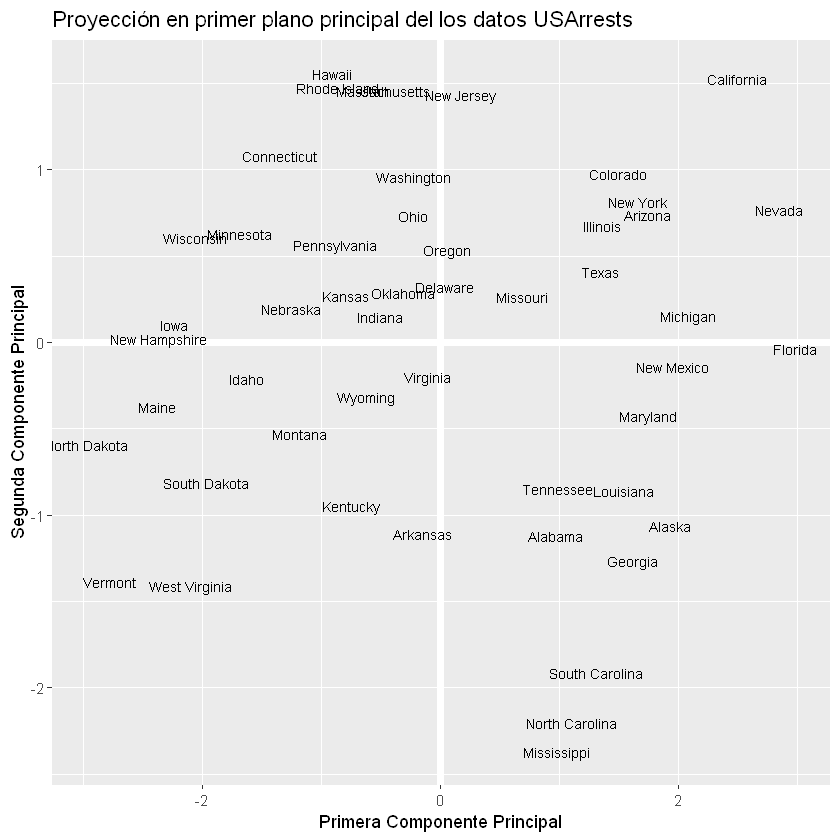

In [20]:
#install.packages('ggplot2')
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

In [21]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

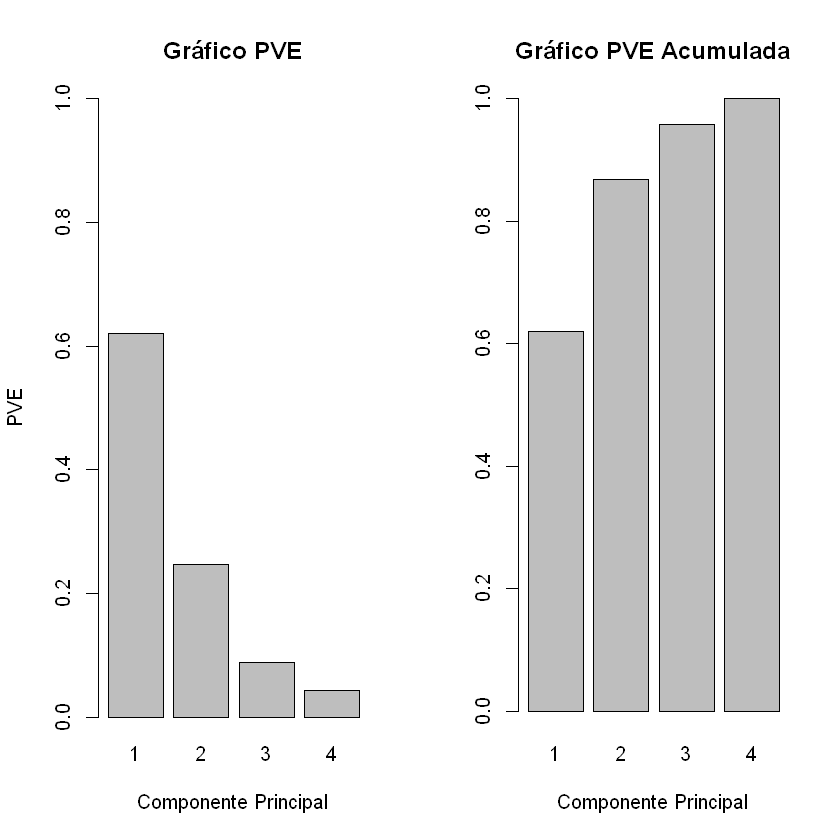

In [22]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [23]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

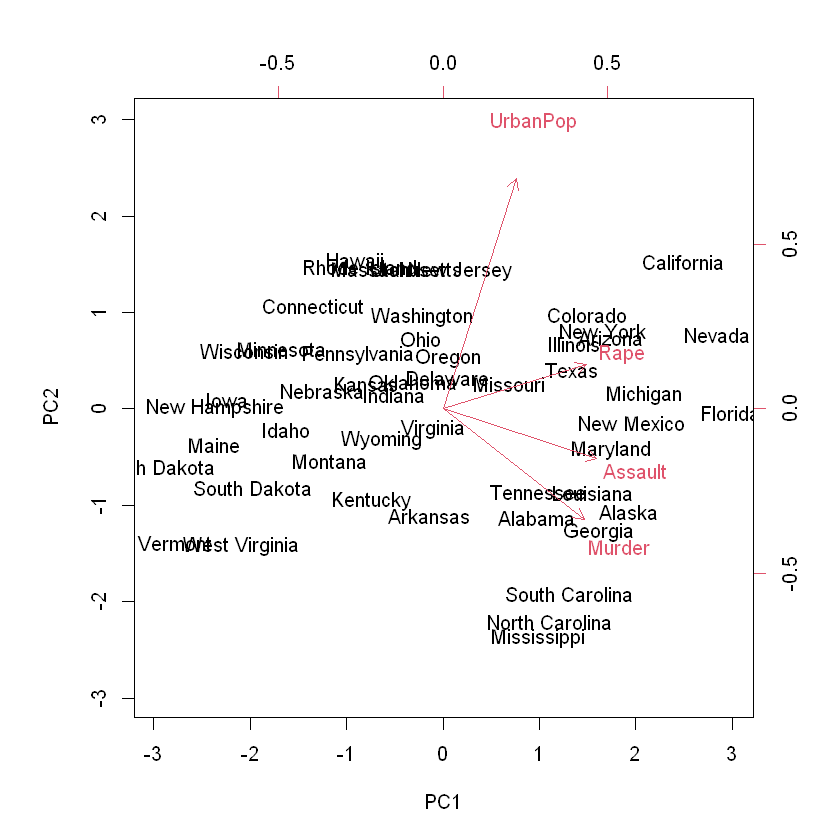

In [24]:
biplot(pca_res, scale = 0)

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.
2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


###### Respuesta 3.1: 
Las coordenadas de las variables en el gráfico biplot corresponden a los pesos de ellas en cada componente principal (ejes derecho y superior) y en el caso de las observaciones, las coordenadas corresponden a la proyección de cada observación en cada eje principal (ejes izquierdo e inferior).

*Interpretación con los datos analizados:* De acuerdo a lo observado en el primer plano principal se tiene que las variables asalto y asesinato tienen una alta correlación positiva, y algo menor con violaciones. Por otra parte se observa independencia de asaltos con población urbana. Mientras que violaciones tiene correlación positiva con población urbana, la variable asesinato tiene correlación negativa con población urbana.

Los estados en  mayor cantidad de arrestos por asesinato son Tennese, Louisiana, Alaska, Alabama, Georgia Carolina y Mississipi, mientras que aquellos con mayor cantidad de arrestos por violaciones son Colorado, New York, Arizona, Illinois, Texas, California y Nevada. En la dirección opuesta, con pocos arrestos en general (lado izquierdo del gráfico) se encuentran los estados de Connecticut, Wisconsin, New Hampshire, Iowa, Dakota, Virgina entre otros.



###### Respuesta 3.2: 
El análisis que entrega prcomp es igual al realizado manualmente, excepto el sentido de la rotación, las proyecciones son finalmente las mismas.
Las componentes del objeto resultante de utilizar la función prcomp son:
- sdev: Corresponde al vector con las desviaciones estándares conservadas por las componentes principales.
- rotation: Es la matriz de rotación, que permite transformar los datos a los ejes principales. Es decir sus columnas corresponden a los vectores propios.
- center: Es el vector de medias de los datos y se usa para centralizar los datos de las columnas en caso de que el parámetro scale sea TRUE.
- scale: Es el vector de desviaciones estándares de los datos y se usa para escalar los datos de las columnas en caso de que el parámetro scale sea TRUE.
- x: Son los datos (ya centralizados y escalados si el parámetro scale es TRUE) una vez aplicada la rotacion.

###### Respuesta 3.3: 

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

[1] 50

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


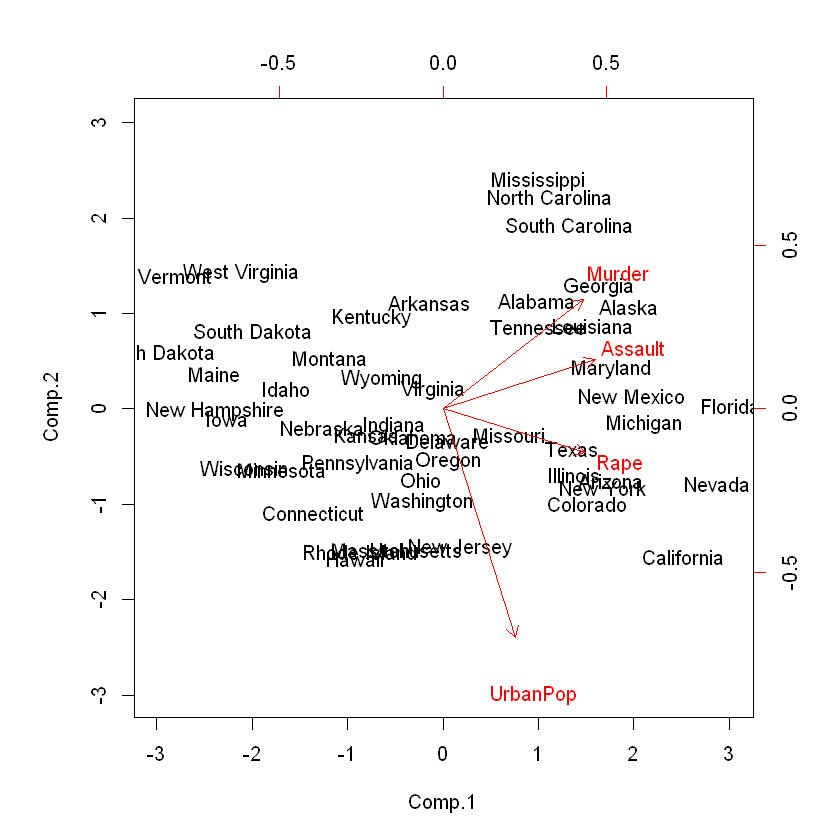

In [3]:
pca_res1 <- princomp(USArrests, cor = TRUE)
names(pca_res1)
pca_res1$sdev
pca_res1$loadings 
pca_res1$center
pca_res1$scale
pca_res1$n.obs 
pca_res1$scores
biplot(pca_res1, scale = 0)

El resultado es el mismo que con prcomp. La principal diferencia es que princomp calcula los valores y vectores propios de la matriz de covarianzas o correlaciones (según el valor del parámetro cor), en cambio prcomp utiliza la descomposición en valores singulares para obtener las componente principales, que de acuerdo a la literatura, tiene mejor comportamiento numérico que el cálculo de los valores propios.  

[1] 100  35

Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,S5,S6,S7,S8,S9,S10,S11,P1,E1,E2
IQUIQUE,238.7030,1.72,1961.235,0.84,81.49160,86.31254,2.13,1140.8336,16.34,...,6949,9.92,4.44,0.30,4.38,19.74,0.74,10.93,10.88373,29.65
ALTO HOSPICIO,185.2202,2.87,1846.297,1.14,77.13106,82.78525,3.29,878.0621,32.75,...,4978,15.32,3.19,2.41,7.76,27.55,0.67,8.83,63.36414,29.09
ANTOFAGASTA,224.1951,2.47,1375.518,1.03,54.05173,93.66913,2.31,1249.4364,6.44,...,13240,7.73,4.34,1.17,5.06,16.58,0.41,19.47,16.32580,25.43
CALAMA,816.2048,3.98,1902.088,1.18,78.97949,83.62586,4.17,1083.3625,12.69,...,4884,10.29,2.77,0.13,4.59,13.67,0.57,17.61,22.60442,28.32
COPIAPà,337.0193,3.92,1812.947,2.19,84.82275,86.97373,5.22,1270.2870,15.06,...,3609,7.76,2.37,2.75,6.26,23.33,0.45,25.54,36.16117,34.38
TIERRA AMARILLA,341.1337,7.72,2355.437,6.49,83.03797,59.28101,10.25,1576.5882,40.59,...,243,11.67,2.19,2.09,14.25,31.41,0.30,37.14,23.49085,56.45


       A1               A2              A3                 A4        
 Min.   : 171.0   Min.   :1.150   Min.   :   85.25   Min.   : 0.280  
 1st Qu.: 241.8   1st Qu.:2.877   1st Qu.: 1018.30   1st Qu.: 1.212  
 Median : 293.4   Median :3.955   Median : 1327.98   Median : 2.265  
 Mean   : 350.5   Mean   :4.448   Mean   : 1569.26   Mean   : 4.375  
 3rd Qu.: 397.0   3rd Qu.:5.747   3rd Qu.: 1885.94   3rd Qu.: 5.258  
 Max.   :1087.7   Max.   :9.880   Max.   :12088.14   Max.   :65.020  
       A5              A6                A7               A8         
 Min.   :26.21   Min.   :  1.068   Min.   : 1.250   Min.   :  367.0  
 1st Qu.:67.98   1st Qu.: 78.886   1st Qu.: 4.025   1st Qu.:  912.1  
 Median :80.39   Median : 92.159   Median : 5.190   Median : 1143.6  
 Mean   :76.05   Mean   : 85.266   Mean   : 6.378   Mean   : 1300.2  
 3rd Qu.:85.42   3rd Qu.: 99.868   3rd Qu.: 7.537   3rd Qu.: 1326.0  
 Max.   :97.09   Max.   :100.000   Max.   :18.670   Max.   :10449.5  
       A9           

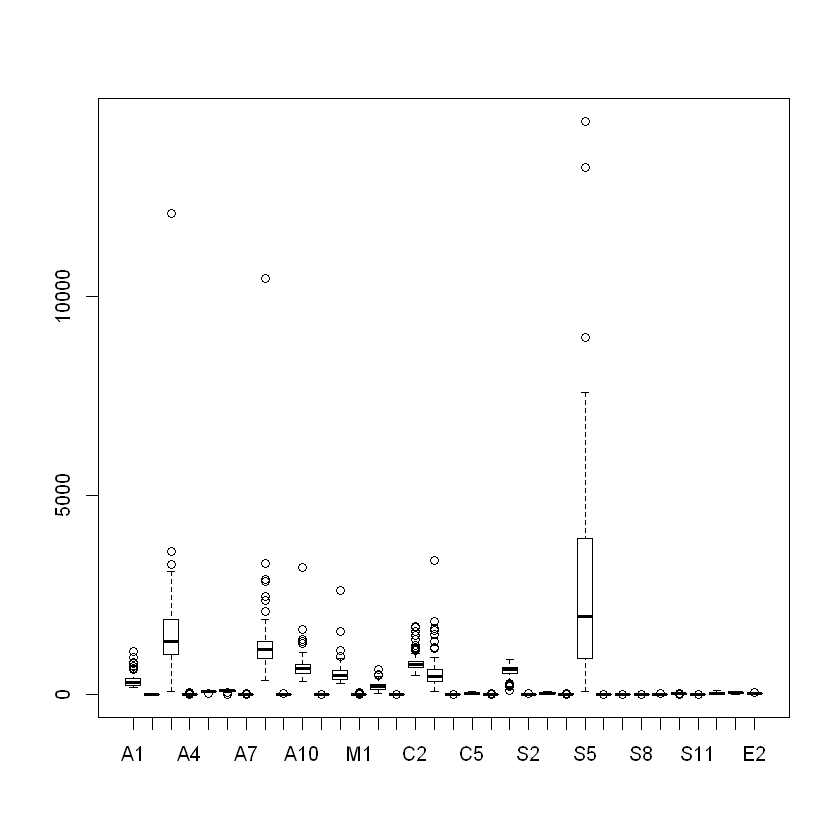

In [7]:
datos <- read.table("..//data//datosComunas.csv",sep=";",dec=",",header= TRUE)
dim(datos)
head(datos)
summary(datos[,2:35])
boxplot(datos[,2:35])

#### Ejercicio 4: 
Considere los datos de caracterización de la calidad  de vida urbana en 100 comunas de Chile, disponible en el archivo "datosComunas.csv", con la respectiva explicación de cada variable en "datosComunas.xlsx". 
1. Realice un análisis exploratorio de los datos y un primer análisis de componentes principales. Analice e interprete sus resultados.
2. Filtre los datos para analizar un grupo específico de comunas (al menos 30), o bien un conjunto específico de variables (al menos 10). Realice un nuevo Análisis de Componentes Principales para estos datos. Analice e interprete sus resultados.

#### Respuesta 4.1 
*Análisis exploratorio de datos*
De la tabla de resúmenes de cada variable y de los boxplots se puede concluir que las variables consideradas tienen escalas diferentes. Por ejemplo A3, A8 y S5 tienen medianas por sobre el resto de las variables y valores extremos sobre 10000. Por otra parte el análisis de correlaciones nos muestra que existen correlaciones positivas y negativas entre las variables.
Lo anterior nos indica que en el análisis en componentes principales sería adecuado utilizar los datos escalados.
*Análisis e interpretacipon PCA*
Se observa que el primer plano principal conserva el 37% de la varianza, por lo que las interpretaciones tienen que considerar esta situación. Es decir la proyección en el primer plano principal deja fuera una parte importante de la variabilidad de los datos. El grafico biplot nos muestra que existen diversar correlación entre variables y se observa también que existen algunas comunas que se alejan del grueso de las comunas, estas son: 66,76,67, 85 y 68 que corresponden a las comunas del sector oriente de Santiago.

In [16]:
datos[c(66,67,68,76,85),1:2]

,Comuna,A1
66,LA REINA,186.2190
67,LAS CONDES,334.7808
68,LO BARNECHEA,519.9644
76,PROVIDENCIA,193.0960
85,VITACURA,787.1449


In [5]:
library(corrplot)

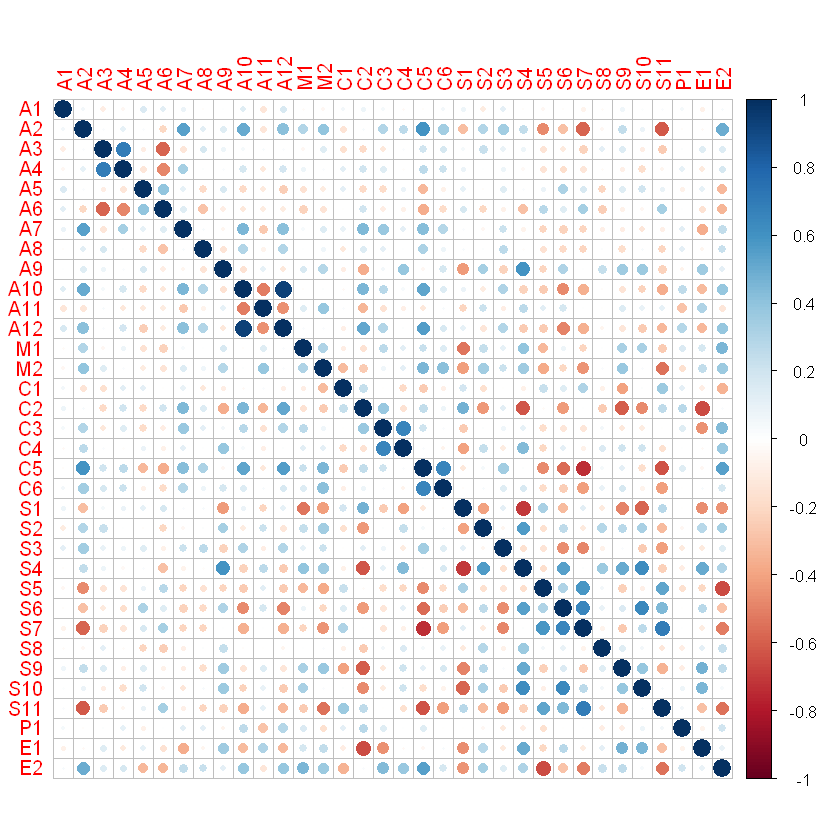

In [9]:
sigma <- cor(datos[,2:35])
corrplot(sigma)

[1] 0.203160977 0.178395300 0.080569102 0.064870982 0.048988150 0.046571556
 [7] 0.042868879 0.035394189 0.034604907 0.029384728 0.026127516 0.024811446
[13] 0.022713459 0.021709187 0.018474556 0.015917423 0.015685587 0.011657134
[19] 0.009361681 0.008911976 0.008694001 0.007942167 0.006884366 0.006278330
[25] 0.005093525 0.004877168 0.004276827 0.003524803 0.003236633 0.002778767
[31] 0.001952158 0.001763002 0.001496480 0.001023040

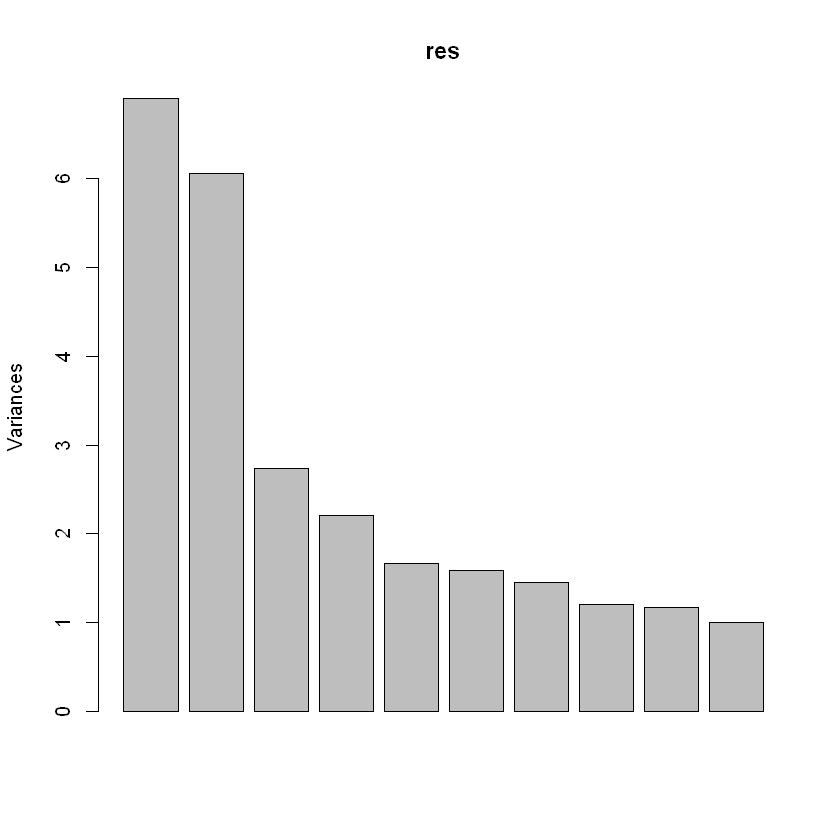

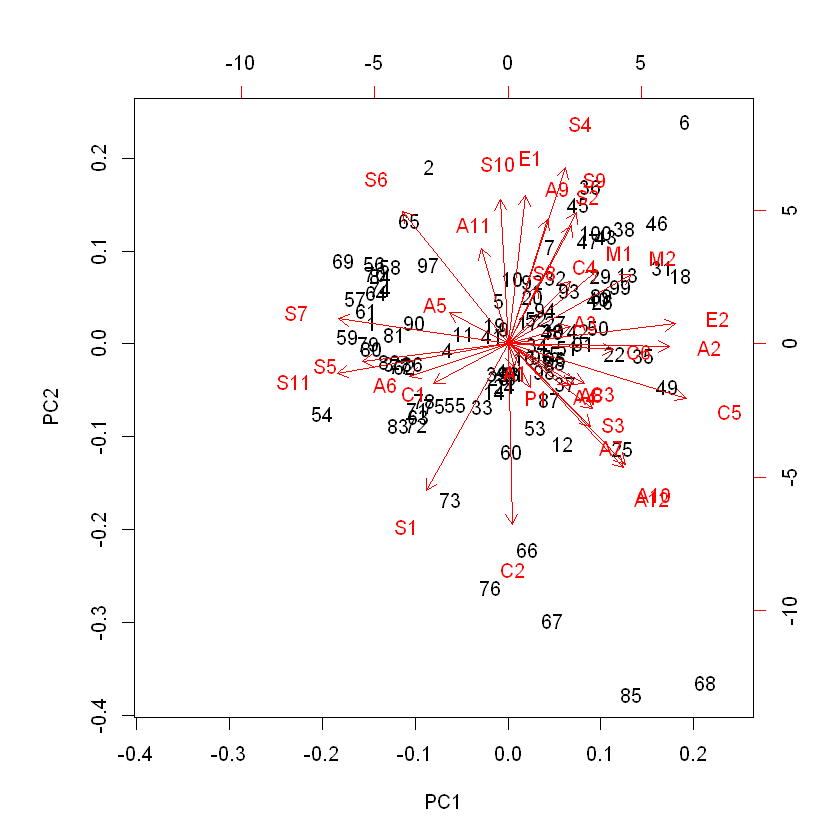

In [10]:
res <- prcomp(datos[,2:35],scale=TRUE)
res$sdev^2/sum(res$sdev^2)
plot(res)
biplot(res)

#### Respuesta 4.2
Considerando el hallazgo del análisis anterior, en este nuevo PCA se analizarán sólo las comunas de Santiago (64 a 105) y las variables referidas al "Acceso a servicios y equipamientos públicos básicos" de las mismas (Letras A1 a A12 en las variables).


In [31]:
datos2 <- datos[54:95,1:13]
datos2

,Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
54,SANTIAGO,354.4907,1.15,790.22939,3.86,68.07196,100.00000,4.64,1185.6366,1.79,384.7996,2.16,389.6287
55,CERRILLOS,614.1644,4.42,717.81217,10.80,86.38899,99.97686,14.58,1243.0830,1.45,733.6970,1.05,349.7809
56,CERRO NAVIA,492.8174,2.35,647.91718,3.73,93.82935,99.99698,5.94,753.9345,8.67,362.0655,0.93,278.3139
57,CONCHALÖ,696.1542,2.86,805.65392,0.61,93.82966,100.00000,3.30,833.5957,11.89,361.6178,1.38,308.2389
58,EL BOSQUE,253.6614,2.16,1363.62227,0.31,79.42398,98.50258,2.03,730.4940,19.83,382.6842,1.47,294.2955
59,ESTACIàN CENTRAL,369.2583,2.72,855.60168,1.68,74.60074,100.00000,3.79,1032.0184,5.12,441.7615,1.37,328.1062
60,HUECHURABA,400.0889,3.56,2058.45374,9.91,85.04398,78.62855,10.78,1313.1644,7.31,1331.5069,0.50,795.3856
61,INDEPENDENCIA,257.4618,1.79,1176.43505,0.28,67.72422,100.00000,1.55,889.5460,5.60,360.0586,1.50,359.2071
62,LA CISTERNA,221.0380,2.58,1475.67851,0.36,53.77526,98.58380,1.78,1039.4319,11.57,402.7078,1.94,330.5472
63,LA FLORIDA,344.7935,3.46,1661.63344,0.63,90.66453,93.12525,3.76,1171.9846,6.64,556.7530,1.32,427.5360


       A1              A2              A3                A4        
 Min.   :171.0   Min.   :1.150   Min.   :  85.25   Min.   : 0.280  
 1st Qu.:246.4   1st Qu.:2.490   1st Qu.: 823.25   1st Qu.: 1.055  
 Median :307.7   Median :3.215   Median :1047.68   Median : 2.215  
 Mean   :362.4   Mean   :3.678   Mean   :1174.81   Mean   : 4.223  
 3rd Qu.:420.8   3rd Qu.:3.908   3rd Qu.:1376.12   3rd Qu.: 4.482  
 Max.   :938.1   Max.   :9.470   Max.   :3263.43   Max.   :18.040  
       A5              A6               A7               A8        
 Min.   :48.50   Min.   : 15.02   Min.   : 1.550   Min.   : 367.0  
 1st Qu.:68.35   1st Qu.: 91.60   1st Qu.: 3.850   1st Qu.: 815.4  
 Median :83.50   Median : 99.71   Median : 4.730   Median :1053.5  
 Mean   :78.80   Mean   : 90.92   Mean   : 6.418   Mean   :1146.2  
 3rd Qu.:90.46   3rd Qu.:100.00   3rd Qu.: 7.112   3rd Qu.:1254.8  
 Max.   :97.09   Max.   :100.00   Max.   :18.670   Max.   :2888.8  
       A9              A10              A11     

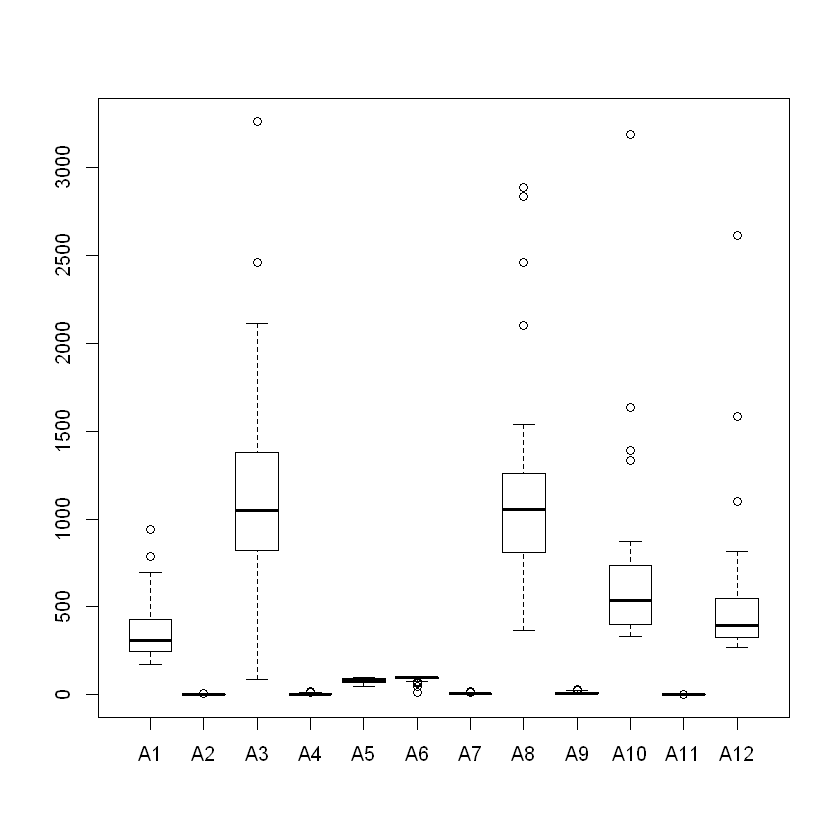

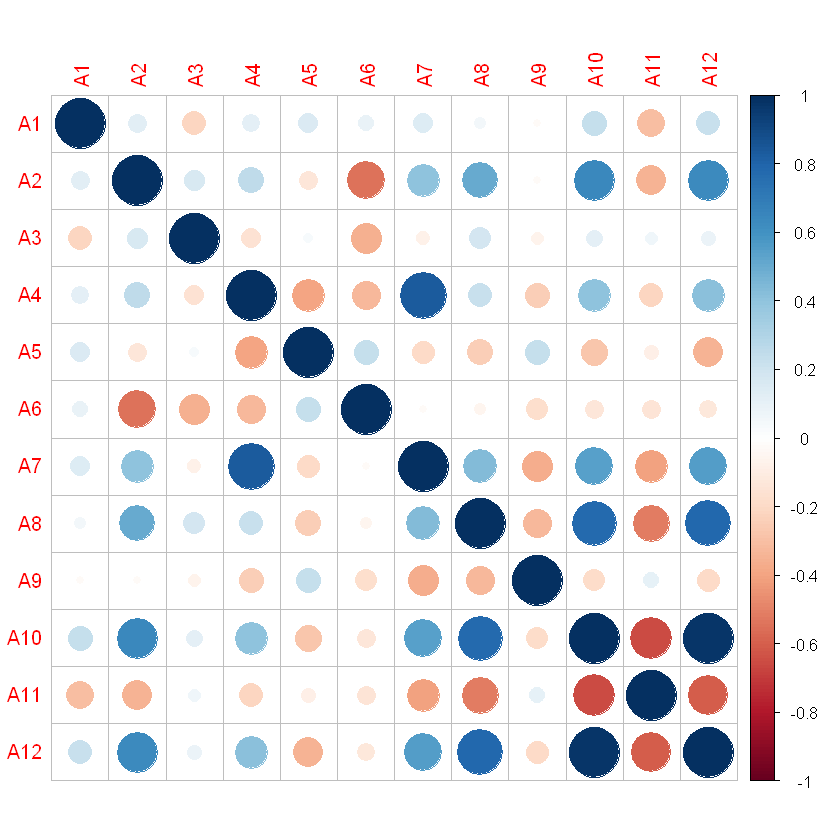

In [33]:

summary(datos2[,2:13])
boxplot(datos2[,2:13])
sigma <- cor(datos2[,2:13])
corrplot(sigma)

[1] 0.3806558558 0.1469325506 0.1279997472 0.1021073532 0.0717033950
 [6] 0.0606126363 0.0418164962 0.0300723122 0.0213065237 0.0145066003
[11] 0.0016499903 0.0006365393

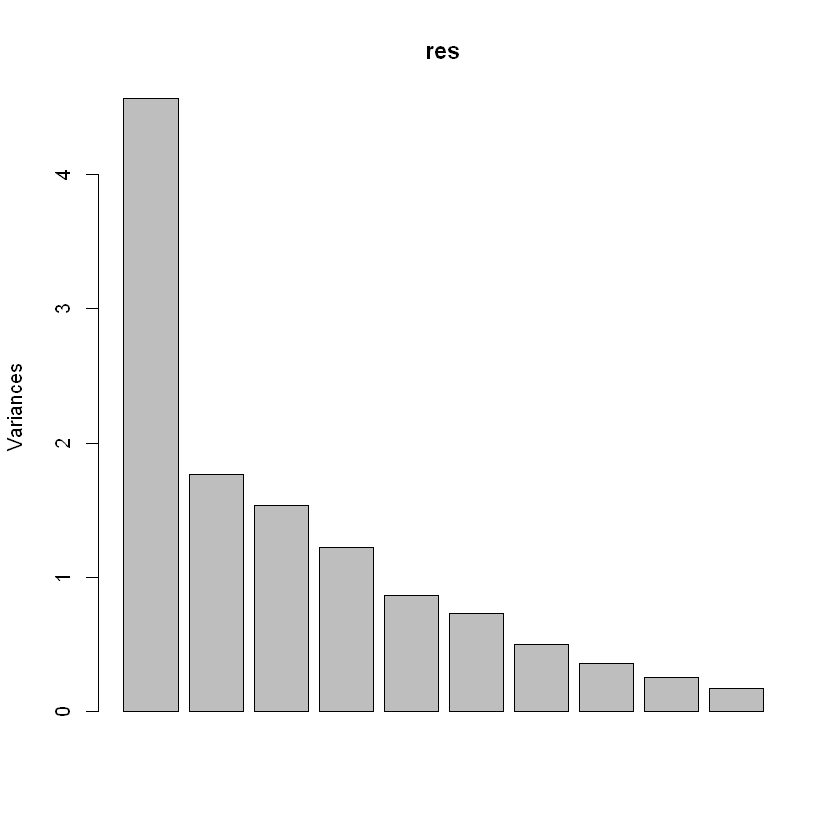

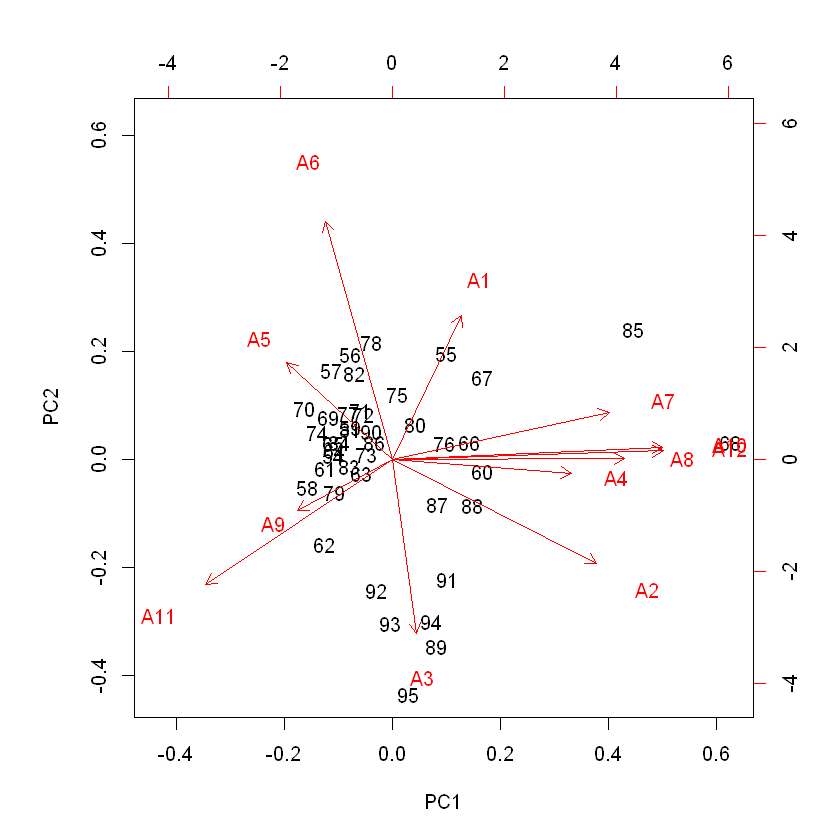

In [34]:
res <- prcomp(datos2[,2:13],scale=TRUE)
res$sdev^2/sum(res$sdev^2)
plot(res)
biplot(res)

*Análisis e interpretacipon PCA*
Luego del filtrado se observa que el primer plano principal conserva el 52% de la varianza. El grafico biplot nos muestra que las comunas del sector oriente de Santiago estan relacionadas positivamente con variables como porcentaje de areas verdes, parques y equipamiento en educación (A4, A7, A8 y A12). En la dirección inversa se encuentran comunas como El Bosque, Lo Prado y Pedro Aguirre Cerda (70,74 y 58) correlacionadas inversamente con dichas variables y positivamente con porcentaje de población atendida por plazas públicas y tasa de jornadas médicas por diez mil hab. (A5 y  A9). Por otra parte comunas del área sur de Santiago tienen fuerte correlación con la variable distancia a parques públicos (A3) y negativa con porcentaje de población atendida por parques públicos (A6), es decir no cuentan con parques cercanos. Las comunas e Cerro Navia, Conchalí y Quilicura (56,57 y 78) están en el extremo inverso.
Este análisis nos permite concluir que el acceso a servicios y equipamiento básico está desigualmente distribuido en la región Metropolitana, existiendo grandes diferencias entre las zonas oriente y occidente, asi como en las comunas del sur y del norte.
